# Интернет-магазин компьютерных игр. Исследование данных о продажах.

В проекте представлена статистика продаж международного интернет-магазина компьютерных игр. Также доступны данные оценки пользователей и экспертов, жанры и платформы.

**Цель исследования**  —  выявить закономерности в данных, определяющие успешность игры . В дальнейшем, результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**

1. Загрузка необходимых библиотек и данных
2. Подготовка данных
3. Исследовательский анализ данных
4. Портрет пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

**Описание данных проекта:**

• Name — название игры <br> 
• Platform — платформа <br>
• Year_of_Release — год выпуска <br>
• Genre — жанр игры <br>
• NA_sales — продажи в Северной Америке (миллионы проданных копий) <br>
• EU_sales — продажи в Европе (миллионы проданных копий) <br>
• JP_sales — продажи в Японии (миллионы проданных копий) <br>
• Other_sales — продажи в других странах (миллионы проданных копий) <br>
• Critic_Score — оценка критиков (максимум 100) <br>
• User_Score — оценка пользователей (максимум 10) <br>
• Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**1. Загрузка необходимых библиотек и данных**

In [1]:
#импортируем библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#прочитаем файл с данными
try:
    df = pd.read_csv('/datasets/games.csv', sep=',')
except:
    df = pd.read_csv('games.csv', sep=',')

In [3]:
#сделаем настройку для просмотра всех столбцов (пригодится при добавлении новых)
pd.options.display.max_columns = 100
# посмотрим на первые строки
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#смотрим информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


  Файл действительно содержит информацию о продажах компьютерных игр в различных регионах. В результате предварительной оценки выяснилось, что тип данных в некоторых столбцах некорректный, например, пользовательский рейтинг с типом object или год релиза с типом float. Так же обязательно надо проверить данные на наличие дубликатов, по возможности, заполнить пропуски и сгруппировать данные для большей наглядности. Названия столбцов необходимо привести к нижнему регистру.

**2. Подготовка данных**

In [5]:
#список столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
#приведем к нижнему регистру
df.columns = df.columns.str.lower()
#проверим
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Столбец 'year_of_release'

In [7]:
#смотрим уникальные значения
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
#смотрим на пропуски
df['year_of_release'].isna().sum()

269

In [9]:
#оценим долю пропусков от общего количества значений
df['year_of_release'].isna().sum()/len(df['year_of_release'])

0.01609332934489979

Доля пропусков всего 1.6%. Удалим пропуски из-за незначительного количества.  В данном проекте необходимо определить актуальный период, на основании которого будем делать прогнозы на 2017 год. Соответственно, мы все равно будем резать датасет, фильтруя по году релиза. Пропуски года релиза наверняка приходится и на платформы, которые 2000 году уже вышли с рынка, то есть для прогноза на 2017 год мы их явно учитывать не будем.

In [10]:
#удалим пропуски
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
#проверим
df['year_of_release'].isna().sum()

0

In [11]:
#поменяем тип данных, логично что год целочисленный
df['year_of_release'] = df['year_of_release'].astype('int')
#посмотрим результат
np.sort(df['year_of_release'].unique())

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Столбец 'critic_score'

In [12]:
#смотрим пропуски
df['critic_score'].isna().sum()

8463

Количество пропусков приличное количество, но это оценочное суждение профессионального критика. Поэтому принимаю решение оставить пропуски. Тип данных этой колонки ОК.

In [13]:
np.sort(df['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Столбец 'user_score'

In [14]:
#количество пропусков
df['user_score'].isna().sum()


6607

Количество пропусков значительное, но это субъективная оценка пользователя. Оставим как есть, дальше посмотрим.Есть интересное значение 'tbd' - to be determined, то есть будет определено. Его заменим на None. Поменяем тип данных на float.

In [15]:
#посмотрим на уникальные значения
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
#меняем значения
df.loc[(df['user_score'] == 'tbd'), 'user_score'] = None
#заменим тип данных
df['user_score'] = df['user_score'].astype('float')
#проверим
np.sort(df['user_score'].unique())


array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Сравним оценки пользователей и критиков

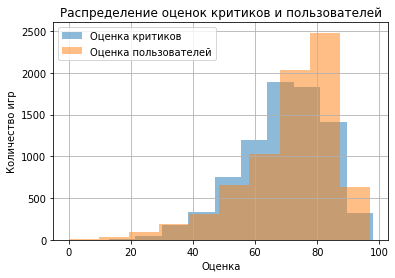

In [17]:
fig, ax = plt.subplots()
df.critic_score.hist(ax=ax, label='Оценка критиков',alpha=0.5)
(df.user_score*10).hist(ax=ax, label='Оценка пользователей', alpha=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и пользователей')
plt.alpha=0.5
plt.show()

Оценки в целом похожи. Разброс оценок у пользователей шире, что логично. Профессиональные критики менее эмоциональны в своих оценках.

Столбец 'rating'

In [18]:
#смотрим значения
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

EC — Early Childhood «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

E — Everyone «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально K-A ("Kids to Adults");

E10+ — Everyone 10+ «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

T — Teen «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

M — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

AO — Adults Only Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

RP — Rating Pending Рейтинг ожидается.

Таким образом значение рейтинга K-A и EC меняем на E.

In [19]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'EC', 'rating'] = 'E'

In [20]:
#проверим
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

Все в порядке. Тип данных ОК, уточним пропуски

In [21]:
df['rating'].isna().sum()

6678

ESRB была основана в 1994 году, а выгрузке присутствуют игры с 1980 года, можно предположить, что отсутствие рейтинга это нормально. Пропуски лучше заменить на значение 'no_rating'

In [22]:
#меняем
df['rating'] = df['rating'].fillna( 'no_rating')
#проверяем
df['rating'].isna().sum()

0

In [23]:
#внимательнее смотрим на пропуски по всему датасету
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
dtype: int64

Столбец 'name'

In [24]:
#пропуска всего 2 (два), удаляем
df = df.dropna(subset=['name']).reset_index(drop=True)

In [25]:
#проверим одни ли это строки, нет имени нет жанра
df['genre'].isna().sum()

0

In [26]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
#проверим на явные дубликаты
df.duplicated().sum()
#не обнаружено

0

In [28]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#проверим
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Вывод. 
Проведена подготовка данных для дальнейшего исследования. Выявлены пропуски в данных, некорректный тип данных. Принято решение удалить строки в столбце 'year_of_release' и 'name', 'genre' содержащие пропуски по причине незначительного количества, тип данных в столбце'year_of_release' приведен к int. В колонке 'rating' заменил устаревшие значения на актуальные и пропуски заменил на 'no_rating'. По полю 'user_score' поменял тип данных и значения 'To Be Determined' заменил на NaN. Остальные пропуски в 'critic_score' и 'user_score' решено оставить без изменения поскольку это субъективные оценки критика и пользователя основанные на собственных представлениях об игре. Медиана и среднее, на мой взгляд, не применимы и могут исказить картину исследования. Причины пропусков можно обозначить как человеческий фактор, новизну игры (не успели оценить), возникновение колонок с оценкой (многие игры вышли на рынок/ушли с рынка раньше, чем появился рейтинг. Явных дубликатов не обнаружено. В датасет добавлен новый столбец содержащий суммарные продажи во всех регионах.

**3. Исследовательский анализ данных**

Посмотрим сколько игр выпускалось в разные годы и как менялись продажи по платформам

In [30]:
#построим сводную таблицу с количеством игр по платформам и годам

In [31]:
games_years = df.pivot_table(index = 'platform', 
                                columns = 'year_of_release', values = 'name', 
                                aggfunc='count',
                                fill_value=0,
                                margins=True
                               ).reset_index()
                               
pd.set_option('display.max_columns', None)
games_years

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2121
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


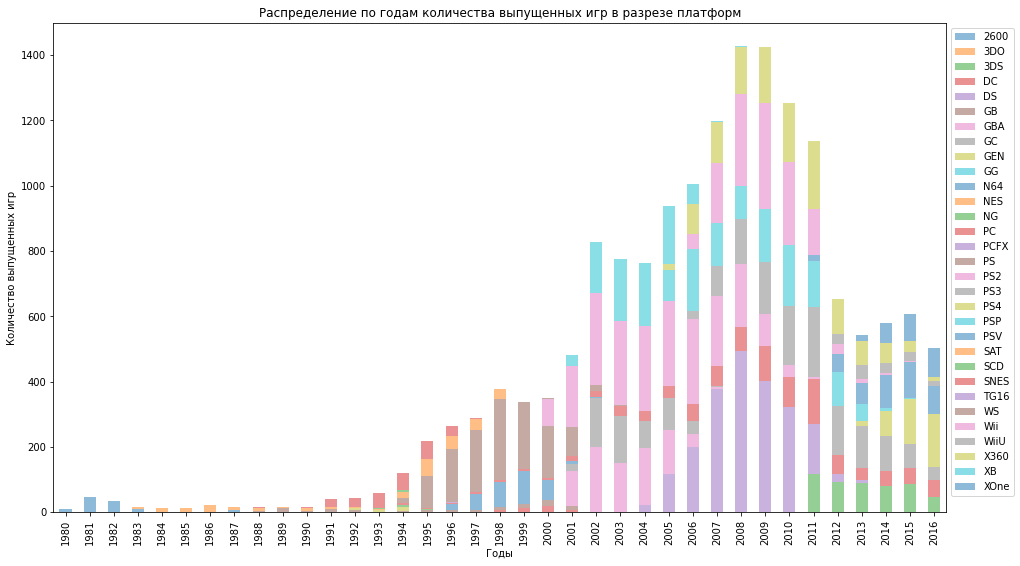

In [32]:
#посмотрим, на распределение компьютерных игр по годам в разрезе платформ
fig, ax = plt.subplots(figsize=(20, 10))

df.pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(16,9), alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Годы')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение по годам количества выпущенных игр в разрезе платформ')

plt.show()

Наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы.
Наибольшее количество игр выпустили платформы PS2 и PS3 (производитель Sony), DS и Wii (производитель Nintendo), X360 (производитель Microsoft). Есть платформы, которые больше не выпускают игры и наборот, есть активные (на момент выгрузки данных) производители. С учетом того, что целью данного исследования является выявление закономерности успешных игр, смотреть на данные платформ, которые не выпускали игры продолжительное время, не стоит.

Выберем платформы с наибольшими суммарными продажами, например первые ТОП-7

In [33]:
# сделаем группировку по платформам, выберем платформы с наибольшими суммарными продажами, 
# например первые ТОП-7
df.groupby('platform').sum()[['total_sales']].reset_index().sort_values(
    by='total_sales', ascending=False
).head(7)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14


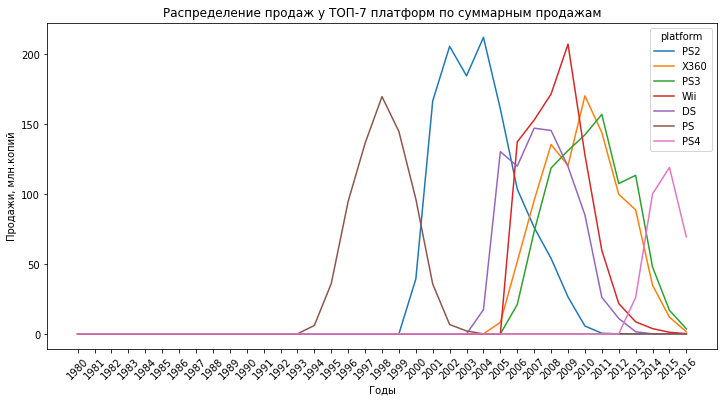

In [34]:
#построим распределение продаж по годам (я о платформах)
top_sales = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', 
    aggfunc = 'sum').fillna(0)
top_sales = top_sales[['PS2', 'X360','PS3','Wii', 'DS', 'PS', 'PS4']]
ax = top_sales.plot(xticks=top_sales.index,figsize=(12,6))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж у ТОП-7 платформ по суммарным продажам')
plt.show()    

Цикл появления новых и исчезновения старых платформ составляет примерно 12 лет. Таким образом, для прогнозирования подаж на следующий год нужно использовать данные за последние 5 лет: платформы, продажи которых растут в течение этого срока, являются наиболее перспективными (пара лет до пика продаж и впереди достаточно большой срок, когда продажи будут падать, но игры все еще будут востребованы и ликвидны).

Решение такое  - смотрим данные за 2012-2016 гг., чтобы понять, какие платформы окажутся в лидерах.

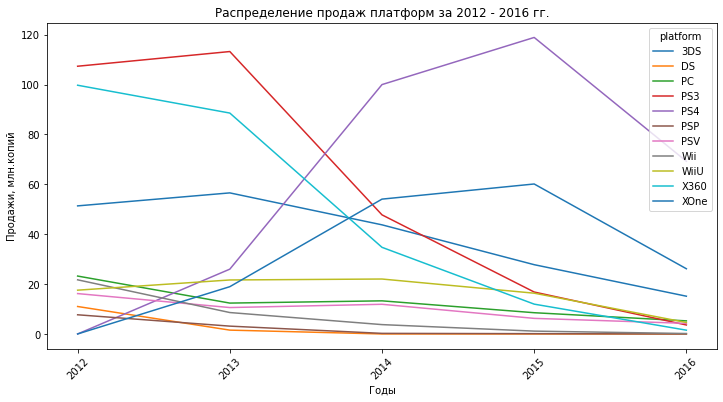

In [35]:
#отрезаем лишнее, все, что старше 2012
df_sales = df.query('year_of_release >= 2012').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).fillna(0)
ax = df_sales.plot(xticks=df_sales.index,figsize=(12,6))
plt.xticks(rotation = 45) 
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж платформ за 2012 - 2016 гг.')
plt.show()   

Cамыми прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft. Некоторое время будут актуальны игры для платформ Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3. Остальные платформы уже упали в продажах и ждать второго дыхания в 2017 году не стоит. Конечно, на графике виден спад абсолютно всех продаж в 2016 году, но это связано с тем, что просто нет полных данных за этот период.

Зафиксируем подитог  - перспективными платформами являются PS4, PS3, XOne, X360, WiiU и 3DS, а актуальный период исследования - 5 лет, т.е. 2012-2016 годы.

In [36]:
#убираем лишнее из датасета
games_top = df.query('year_of_release >= 2012 & platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]')
games_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [37]:
games_top = df.query('year_of_release >= 2012')
games_top.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


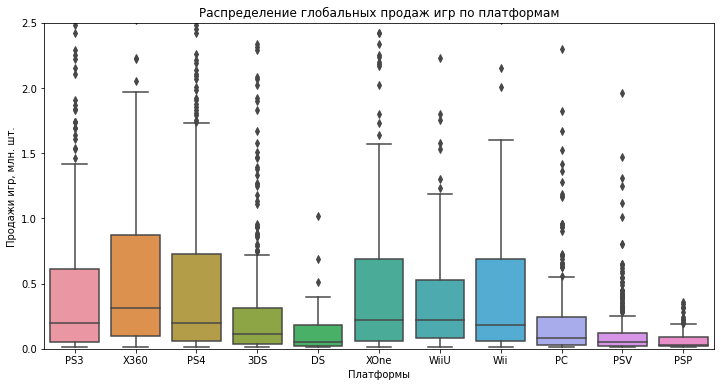

In [38]:
#строим 'ящик с усами' для распределения глобальных продаж игр в разбивке по всем платформам
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='platform', y='total_sales', data=games_top)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение глобальных продаж игр по платформам')
plt.show()

Медианные значения продаж смещены к нижнему краю. Это означает,что на всех платформах выходит много игр с относительно небольшими продажами. При этом везде есть некоторое количество бестселлеров, продажи которых могут многократно превышать обычные значения.

Влияние на продажи отзывов критиков и пользователей

In [39]:
#средние оценки перспективных платформ за последние 5 (пять) лет
games_top.groupby('platform')[['user_score', 'critic_score']].agg('mean').round(2)

,user_score,critic_score
platform,,
3DS,7.03,69.82
DS,7.00,80.00
PC,6.43,75.84
PS3,6.53,71.57
PS4,6.75,72.09
PSP,5.95,74.00
PSV,7.41,71.33
Wii,6.08,76.20
WiiU,6.90,70.73


Выше среднего конечно, но не огонь. Посчитаем корреляцию между отзывами и продажами для выборочных платформ.

In [40]:
#для платформы PS4
games_top.query('platform == "PS4"')['total_sales'].\
corr(games_top.query('platform == "PS4"')['user_score'])

-0.031957110204556376

In [41]:
games_top.query('platform == "PS4"')['total_sales'].\
corr(games_top.query('platform == "PS4"')['critic_score'])

0.406567902061781

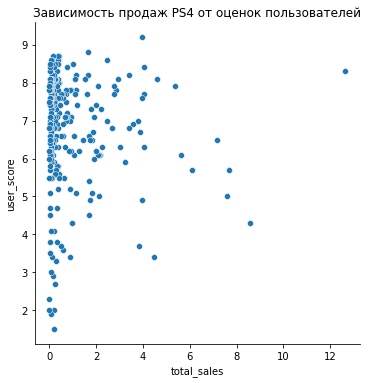

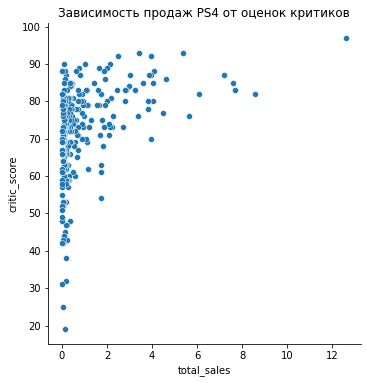

In [42]:
#диаграмма рассеивания
sns.relplot(x='total_sales', y='user_score',data=games_top.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок пользователей')
sns.relplot(x='total_sales', y='critic_score',data=games_top.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок критиков')
plt.show()

In [43]:
#для платформы XOne
games_top.query('platform == "XOne"')['total_sales'].\
corr(games_top.query('platform == "XOne"')['user_score'])

-0.06892505328279412

In [44]:
games_top.query('platform == "XOne"')['total_sales'].\
corr(games_top.query('platform == "XOne"')['critic_score'])

0.41699832800840175

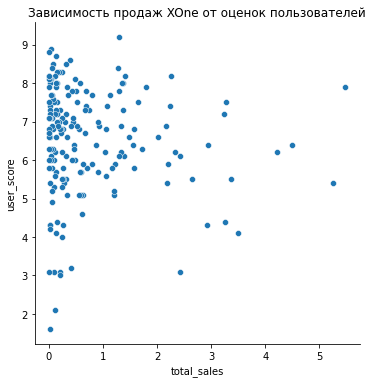

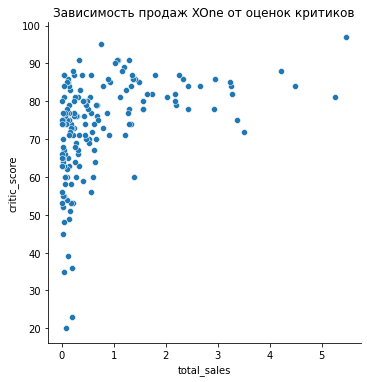

In [45]:
#диаграмма рассеивания
sns.relplot(x='total_sales', y='user_score',data=games_top.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок пользователей')
sns.relplot(x='total_sales', y='critic_score',data=games_top.query('platform == "XOne"'))
plt.title('Зависимость продаж XOne от оценок критиков')
plt.show()


Прямой зависимости не наблюдается но, кажется, что оценки критиков влияют на продажи чуть больше.

Проверим это предположение на остальных перспективных платформах

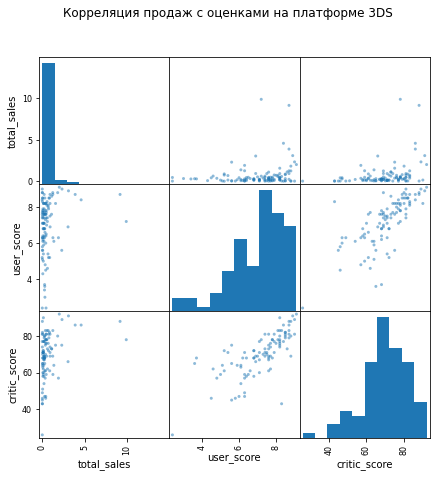

,total_sales,user_score,critic_score
total_sales,1.000000,0.197583,0.320803
user_score,0.197583,1.000000,0.722762
critic_score,0.320803,0.722762,1.000000


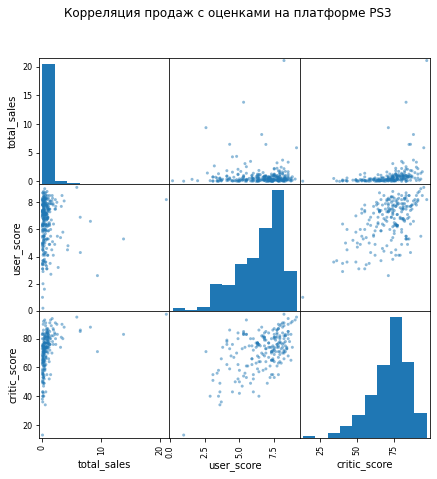

,total_sales,user_score,critic_score
total_sales,1.000000,-0.005144,0.331497
user_score,-0.005144,1.000000,0.539456
critic_score,0.331497,0.539456,1.000000


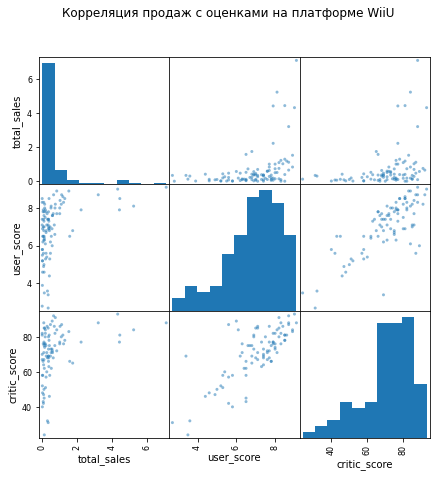

,total_sales,user_score,critic_score
total_sales,1.000000,0.400219,0.34838
user_score,0.400219,1.000000,0.77008
critic_score,0.348380,0.770080,1.00000


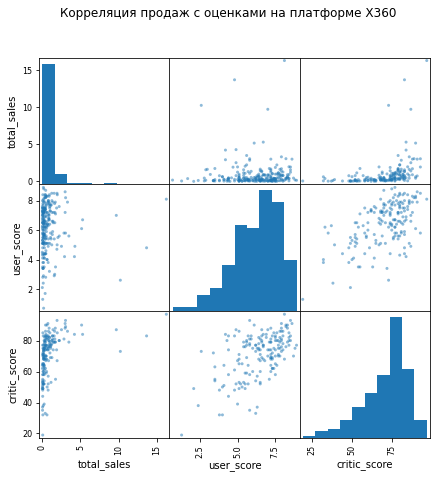

,total_sales,user_score,critic_score
total_sales,1.000000,0.006164,0.360573
user_score,0.006164,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


In [46]:
#рассчитаем коофициент корреляции и построим диаграммы
platform_list = ['3DS', 'PS3','WiiU', 'X360']

for platform in platform_list:
    data = games_top.query('platform == @platform')[['total_sales','user_score', 'critic_score']]
    
    fig, ax = plt.subplots(figsize = (7,7))
    pd.plotting.scatter_matrix(data, ax=ax)
    fig.suptitle(f'Корреляция продаж с оценками на платформе {platform}')
    plt.show()   
    
    display(games_top.query('platform == @platform')[['total_sales','user_score', 'critic_score']].agg('corr'))

Предположение подтвердилось, профессиональные критики действительно некоторым образом влияют на продажи, но сказать, что от их мнения зависят продажи напрямую, тоже нельзя. Оценки пользователей влияют на продажи еще меньше.
Однако, мы получили и иной результат - на платформе WiiU (Wii U от Nintendo) отзывы пользователей коррелируют с продажами больше, чем отзывы критиков.

Теперь посмотрим на распределение игр по жанрам

In [47]:
# Комментарий ревьюера
temp1, temp2 = games_top.total_sales.sum(), df.query('year_of_release >= 2012').total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1446.5300000000002, 1446.5300000000002, 0.0)

In [48]:
#как распределяется общее количество
games_top['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [49]:
#сгруппируем по топовым платформам
games_top.pivot_table(index = 'genre', columns = 'platform', values = 'total_sales',aggfunc='sum',
    margins=True).fillna(0).sort_values(by='All', ascending=False)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
genre,,,,,,,,,,,,
All,194.61,12.55,62.65,288.79,314.14,11.19,49.18,35.37,82.19,236.54,159.32,1446.53
Action,45.49,1.82,13.14,115.75,96.10,3.76,16.33,10.75,19.07,81.60,37.31,441.12
Shooter,0.13,0.00,14.27,60.39,88.56,0.00,2.34,0.00,6.01,72.70,60.33,304.73
Role-Playing,79.30,9.08,13.65,22.62,28.99,2.81,12.05,1.06,2.89,9.80,10.55,192.80
Sports,4.23,0.11,3.26,44.84,55.61,1.41,3.21,2.11,3.16,36.39,26.74,181.07
Misc,9.45,0.48,0.73,8.88,8.19,0.41,4.32,17.86,12.46,14.83,7.43,85.04
Platform,19.11,0.69,0.14,4.26,7.69,0.00,2.26,2.25,21.53,2.14,0.93,61.00
Racing,0.28,0.00,1.23,11.56,12.14,0.00,2.21,0.01,7.87,8.41,9.79,53.50
Fighting,8.46,0.00,0.12,11.00,8.65,0.36,2.21,0.00,6.27,4.97,2.45,44.49


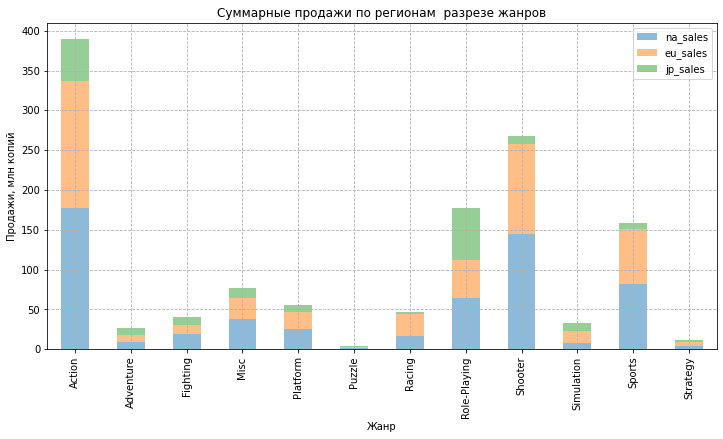

In [50]:
#визуализируем данные по регионам продаж
fig, ax = plt.subplots()

(games_top
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

Самыми продаваемыми жанрами в играх являются Action, Shooter и Sports.

Action - сущность экшенов отражает их название – в переводе с английского оно означает «действие», и здесь игрок находится в самом центре действия и управляет им.

Shoters - шутеры позволяют игрокам использовать в своих действиях оружие, обычно с целью уничтожить врагов или противоборствующих игроков. Шутеры делятся по ракурсу обзора игрока (от первого лица, от третьего лица, с обзором сверху)ю

Sports - спортивные игры, как и следует из названия, симулируют различные виды спорта, например, гольф, баскетбол, обычный и американский футбол. Встречаются также олимпийские виды спорта типа лыжных гонок, и даже «барный спорт» вроде бильярда или дартс.

Самые низкие продажи у игр в жанрах Adventure, Strategy и Puzzle.

Adventure - обычно в приключенческих играх пользователи взаимодействуют с другими персонажами и окружающим миром для решения головоломок с подсказками, продвигаясь таким образом по сюжету. Не считая периодических мини-игр, в квестах редко встречаются экшен-элементы. Поэтому среди мейнстримных геймеров жанр не так популярен.

Strategy - геймплей этого жанра уходит своими корнями в традиционные настольные стратегические игры. Часто в этих играх вам доступен целый мир и все его ресурсы, а чтобы справиться с испытаниями, игроку требуется тщательно продумывать стратегию и тактику.

Puzzle - думаем, что здесь пояснения не нужны.

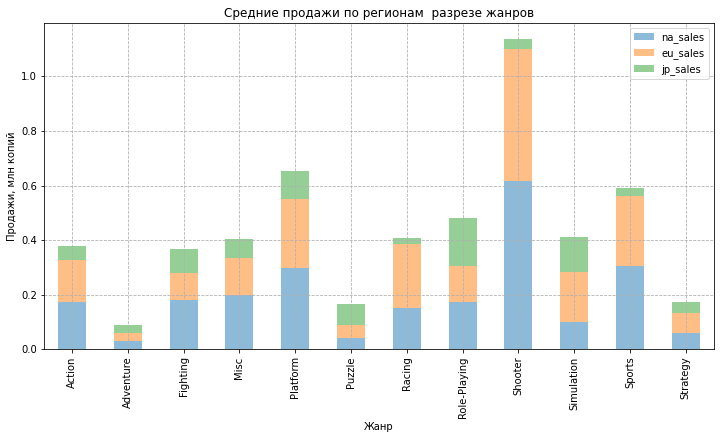

In [51]:
#построим аналогичный график для среднего количества продаж
fig, ax = plt.subplots()

(games_top
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('mean')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Средние продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

А вот по среднему количеству продаж мы наблюдаем смену лидеров: теперь на первом месте по продажам - Shooters, а в тройке лидеров появляется жанр Platform. Action выбыл из топ-5.
Такой результат говорит нам о том, что этих жанрах есть игры-хиты с многомиллионными продажами.
Platform - вид аркад, в которых нужно, управляя героем, ходить, бегать и запрыгивать на разные платформы (или возвышенности), в большинстве случаев, нейтрализуя или избегая врагов, и собирать различные бонусы.

**4. Портрет пользователя каждого региона**

In [52]:
#определим самые популярные платформы для каждого региона, посчитаем долю продаж за 5 лет
games_top.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,8.4%,45.6%,9.4%
DS,0.7%,1.9%,0.8%
PC,7.5%,0.0%,3.2%
PS3,21.1%,18.3%,17.5%
PS4,27.8%,8.3%,18.4%
PSP,0.1%,5.4%,0.0%
PSV,2.2%,10.9%,1.9%
Wii,2.4%,1.8%,3.0%
WiiU,5.0%,6.8%,6.4%


Европейские пользователи предпочитают Sony PlayStation (более 55% рынка), американские - Microsoft XBox (почти 39% рынка), японские геймеры голосуют деньгами за Nintendo 3DS(45,6%) и Sony (35%)

Корректировка: Европейские пользователи предпочитают Sony PlayStation (почти 50% рынка), американские - Microsoft XBox (более 43% рынка), японские геймеры голосуют деньгами за Nintendo 3DS(57%).

In [53]:
# а как распределяются жанры по регионам
games_top.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,31.4%,27.4%,30.1%
Adventure,1.9%,4.3%,1.5%
Fighting,2.1%,4.9%,3.3%
Misc,5.2%,6.7%,6.5%
Platform,4.2%,4.5%,4.3%
Puzzle,0.3%,1.1%,0.2%
Racing,5.4%,1.3%,2.9%
Role-Playing,9.6%,34.0%,10.8%
Shooter,22.4%,4.8%,24.5%


В распределении долей рынка по жанрам у пользователей Америки и Европы вкусы совпадают по первым четырем пунктам из ТОП5: Action -> Shooters -> Sports -> Role_playing. А вот на пятой строчке в Европе гонки, в то время как у жителей Северной Америки - Misc (от англ. Miscellaneuos = разное или прочее). У японцев иначе: Role-Playing -> Action -> Misc -> Simulation -> Shooters.

В Северной Америке самая большая доля рынка от глобальных продаж, а самые продаваемые платформы принадлежат местному производителю Microsoft. Европа второй по величине рынок, абсолютным лидером среди платформ является Sony Playstation, Европа и Северная Америка похожи – главные жанры Action, шутеры и спорт. Япония занимает третье место по продажам; рынок не похож на остальные: местные производители целиком и полностью доминируют по продажам, оставив остальным производителям всего около 1% рынка; в жанровых препочтениях Япония – единственный рынок, где предобладает RPG.

In [54]:
# посмотрим как рейтинг ESRB влияет на продажи в отдельном регионе
games_top.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,22.3%,14.7%,19.4%
E10+,10.9%,4.3%,12.8%
M,38.3%,11.0%,39.2%
T,10.4%,13.5%,11.2%
no_rating,18.1%,56.5%,17.5%


Занятно, что почти половина игр японского рынка без рейтинга. Возможно, он не требуется для локальных игр, или устанавливаетcя другой организацией (не ESBP). Но, если уточнить, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. 

**5. Проверка гипотез**

Проверим гипотезу что средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые

Сформулируем нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки будем использовать данные из двух генеральных совокупностей. Для оценки будем использовать критерий двустороннее значение p-value - вероятность совпадения рейтингов.

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_a: Средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые

alpha = 0.05

In [55]:
#подсчитаем оценки за полный период, не было отдельных указаний
display(games_top.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))

#удалим пропуски 
xone = games_top.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = games_top.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

,user_score
platform,
PC,6.428641
XOne,6.521429


Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод **st.stats.ttest_ind**, так же я буду использовать параметр **equal_var=False**, т.к. есть сомнения в равнозначности выборок.

Если p-value будет меньше выбранного уровня значимости **0.05** то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [56]:
# импортируем библиотеку stats
from scipy import stats as st

In [57]:
alpha = .05 
results = st.stats.ttest_ind(xone, pc, equal_var=False)
print('p-значение: ', results.pvalue)   
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги Xbox One и PC различаются.

Проверим гипотезу что Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу, о том, что средние пользовательские рейтинги  жанров Action и Sports разные. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки будем использовать данные из двух генеральных совокупностей. Для оценки будем использовать критерий двустороннее значение p-value - вероятность совпадения рейтингов.

H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H_a: Средние пользовательские рейтинги жанров Action и Sports разные

alpha = 0.05

In [58]:
#подсчитаем оценки за полный период, не было отдельных указаний
display(games_top.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score'))

#удалим пропуски 
action = games_top.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sports = games_top.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

,user_score
genre,
Action,6.825048
Sports,5.455897


Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод **st.stats.ttest_ind**, так же я буду использовать параметр **equal_var=False**, т.к. есть сомнения в равнозначности выборок.

Если p-value будет меньше выбранного уровня значимости **0.05** то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [59]:
alpha = .05 
results = st.stats.ttest_ind(action, sports, equal_var=False)
print('p-значение: ', results.pvalue)   
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


Различие средних значений пользовательских оценок игр двух жанров статистически значимо.

**6. ОБЩИЙ ВЫВОД**.
    В ходе исследования проанализирована статистика продаж международного интернет-магазина компьютерных игр. Выявлены закономерности в данных, определяющие успешность игры. В дальнейшем, результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    В результате предварительной оценки выяснилось, что тип данных в некоторых столбцах некорректный, данные обязательны к проверке на наличие дубликатов, есть пропуски. Проведена подготовка данных для дальнейшего исследования. 
    Установлено, что наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы. Самое большое количество игр выпустили платформы PS2 и PS3 (производитель Sony), DS и Wii (производитель Nintendo), X360 (производитель Microsoft). Есть платформы, которые больше не выпускают игры и наборот, есть активные (на момент выгрузки данных) производители. 
    Самыми продаваемыми жанрами в играх являются Action, Shooter и Sports. В распределении долей рынка по жанрам у пользователей Америки и Европы вкусы совпадают по первым четырем пунктам из ТОП5: Action -> Shooters -> Sports -> Role_playing. А вот на пятой строчке в Европе гонки, в то время как у жителей Северной Америки - Misc (от англ. Miscellaneuos = разное или прочее). У японцев иначе: Role-Playing -> Action -> Misc -> Simulation -> Shooters.
    В Северной Америке самая большая доля рынка от глобальных продаж, а самые продаваемые платформы принадлежат местному производителю Microsoft. Европа второй по величине рынок, абсолютным лидером среди платформ является Sony Playstation, Европа и Северная Америка похожи – главные жанры Action, шутеры и спорт. Япония занимает третье место по продажам; рынок не похож на остальные: местные производители целиком и полностью доминируют по продажам, оставив остальным производителям всего около 1% рынка; в жанровых препочтениях Япония – единственный рынок, где предобладает RPG.
    Сформулирована нулевая гипотеза, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. В итоге отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось. 
    Также проверена гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные. отвергнута нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.
    Таким образом проведенное исследование позволило определить перспективные рынки, сегменты и локации для планирования продаж и продвижения в 2017 году, а также обосновать предложенный выбор.

Иследовательский анализ данных показал, что потенциально успешный продукт должен обладать рядом характеристик:
    Игра должна быть разработана для платформ PS4 или XOne, если речь идет о западном рынке, и — для платформы 3DS, если игру планируется продавать в Японии.
    Жанр: Action, Shooter, Sports для Запада, Role-Playing — для Японии.
    Рейтинг ESRB: либо от 17 лет (для Америки и Европы) или от 13 лет (для Японии). Рейтинг от 6 лет и старше также будет хорошим выбором, но тогда набор жанров сужается. Ориентироваться на оценки пользователей нет смысла, на продажи это не оказывает существенного влияния. Однако на отзывы критиков обратить внимание стоит.